In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

from typing import List

/home/gwenm/.pyenv/versions/3.10.6/envs/inspiart/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Download the database (table part)

In [2]:
# Set the path to the file you'd like to load
file_path = "wikiart_art_pieces.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "simolopes/wikiart-all-artpieces",
  file_path
)

df.head()

/tmp/ipykernel_5042/4128968621.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


artist                         style               genre  \
0  Byzantine Mosaics  Early Byzantine (c. 330–750)  religious painting   
1  Byzantine Mosaics  Early Byzantine (c. 330–750)  religious painting   
2  Byzantine Mosaics  Early Byzantine (c. 330–750)  religious painting   
3  Byzantine Mosaics  Early Byzantine (c. 330–750)  religious painting   
4  Byzantine Mosaics  Early Byzantine (c. 330–750)  religious painting   

        movement                                               tags  \
0  Byzantine Art  ['Holyplaces', 'Byzantinearchitecture', 'Arch'...   
1  Byzantine Art    ['Holyplaces', 'Byzantinearchitecture', 'Arch']   
2  Byzantine Art                             ['Prophet', 'History']   
3  Byzantine Art                          ['Holyplaces', 'Prophet']   
4  Byzantine Art                          ['Holyplaces', 'Prophet']   

                                                 url  \
0  https://www.wikiart.org/en/byzantine-mosaics/e...   
1  https://www.wikiart.org/en/byzantine-mosaics/e...   
2  https://www.wikiart.org/en/byzantine-mosaics/e...   
3  https://www.wikiart.org/en/byzantine-mosaics/e...   
4  https://www.wikiart.org/en/byzantine-mosaics/e...   

                                                 img  \
0  https://uploads2.wikiart.org/00211/images/byza...   
1  https://uploads2.wikiart.org/00211/images/byza...   
2  https://uploads2.wikiart.org/00211/images/byza...   
3  https://uploads2.wikiart.org/00211/images/byza...   
4  https://uploads2.wikiart.org/00211/images/byza...   

                                  file_name  
0  0-ravenna-cappella-arcivescovile-166.jpg  
1  1-ravenna-cappella-arcivescovile-167.jpg  
2  2-ravenna-cappella-arcivescovile-168.jpg  
3  3-ravenna-cappella-arcivescovile-169.jpg  
4  4-ravenna-cappella-arcivescovile-171.jpg

In [3]:
df.shape

(176436, 8)

# Display an image 

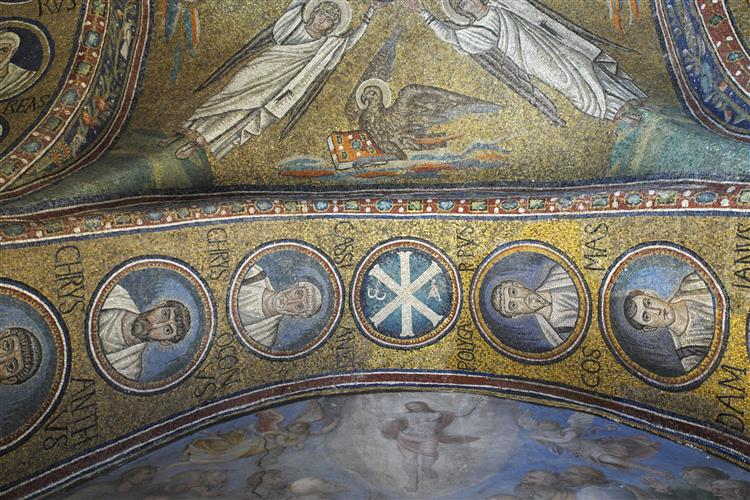

In [4]:
# Récupérer l'URL de la première image
url = df['img'][1]

# Télécharger l'image
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Afficher directement dans le notebook
display(img)

# Exploring the database

In [5]:
df_grouped = df.groupby(['artist', 'style', 'genre', 'movement']).count().drop(columns=['tags', 'url', 'file_name'])
df_grouped

img
artist        style                genre                             movement               
3D            Street art           graffiti                          Street art            5
                                   symbolic painting                 Street art            5
A.Y. Jackson  Art Nouveau (Modern) landscape                         Art Nouveau          18
              Post-Impressionism   landscape                         Art Nouveau           9
              Symbolism            landscape                         Art Nouveau           4
...                                                                                      ...
Émilie Charmy Fauvism              portrait                          Post-Impressionism    2
                                   still life                        Post-Impressionism    1
              Post-Impressionism   nude painting (nu),genre painting Post-Impressionism    1
                                   portrait                          Post-Impressionism    1
                                   portrait,genre painting           Post-Impressionism    1

[26869 rows x 1 columns]

### Artists 

In [6]:
df_artist_movement = df.groupby(['artist', 'movement']).count().drop(columns=['tags', 'url', 'file_name', 'style', 'genre'])
df_artist_movement

img
artist                 movement                                    
3D                     Street art                                10
A.Y. Jackson           Art Nouveau                               31
Aaron Douglas          Harlem Renaissance (New Negro Movement)   17
Aaron Siskind          Abstract Expressionism                    23
Abbas Kiarostami       Contemporary                              44
...                                                             ...
Édouard De Bièfve      Romanticism                                3
Émile Bayard           Academic Art                              58
Émile Friant           Realism                                   63
Émile Prisse d'Avennes Romanticism                               12
Émilie Charmy          Post-Impressionism                        39

[3210 rows x 1 columns]

In [7]:
df_artist_nb_movements = df.groupby('artist')['movement'].nunique()
df_artist_nb_movements

artist
3D                        1
A.Y. Jackson              1
Aaron Douglas             1
Aaron Siskind             1
Abbas Kiarostami          1
                         ..
Édouard De Bièfve         1
Émile Bayard              1
Émile Friant              1
Émile Prisse d'Avennes    1
Émilie Charmy             1
Name: movement, Length: 3209, dtype: int64

===> Each artist is associated to a movement 

### Genres and styles 

In [8]:
#print all different genres in the database
genres = df['genre'].unique()
genres

array(['religious painting', 'ornament', 'animal painting',
       'mythological painting', 'no genre', 'portrait', 'landscape',
       'portrait,religious painting', 'religious painting,portrait',
       'icon', 'icon,mosaic', 'icon,sculpture', 'icon,miniature',
       'icon,portrait', 'icon,religious painting', 'miniature',
       'religious painting,icon', 'architecture',
       'sculpture,architecture', 'genre painting',
       'battle painting,history painting', 'illustration', 'cityscape',
       'allegorical painting', 'sketch and study',
       'religious painting,miniature', 'jewelry', 'sculpture',
       'miniature,religious painting', 'miniature,portrait',
       'religious painting,illustration', 'design',
       'sculpture,self-portrait', 'battle painting', 'history painting',
       "religious painting,trompe-l'œil", 'self-portrait',
       'religious painting,allegorical painting',
       'genre painting,nude painting (nu)', 'nude painting (nu)',
       'portrait,genre p

In [9]:
#print all different styles in the database
styles = df['style'].unique()
styles

array(['Early Byzantine (c. 330–750)', 'Byzantine',
       'Macedonian Renaissance (867–1056)',
       'Middle Byzantine (c. 850–1204)', 'Komnenian style (1081-1185)',
       'Late Byzantine/Palaeologan Renaissance (c. 1261–1453)',
       'Coptic art', 'Unknown', 'Romanesque',
       'Kyiv school of icon painting', 'Novgorod school of icon painting',
       'Crusader workshop', 'Vladimir school of icon painting',
       'Yaroslavl school of icon painting', 'Galicia-Volyn school',
       'Latin Empire of Constantinople (1204-1261)',
       'Vologda school of icon painting',
       'Moscow school of icon painting', 'Pskov school of icon painting',
       'Cretan school of icon painting',
       'Macedonian school of icon painting',
       'Stroganov school of icon painting',
       'Chernihiv school of icon painting', 'Baroque', 'Mozarabic',
       'Mosan art', 'International Gothic', 'Proto Renaissance', 'Gothic',
       'Early Renaissance', 'Northern Renaissance', 'Viking art',
       

In [10]:
df_genres = df.groupby(['genre', 'style']).count().drop(columns=['tags', 'url', 'file_name', 'artist','movement']).reset_index()
df_genres

genre                   style   img
0                              abstract            Abstract Art  1440
1                              abstract  Abstract Expressionism  3128
2                              abstract             Academicism     1
3                              abstract         Action painting   104
4                              abstract      Analytical Realism     4
...                                 ...                     ...   ...
4208                  wildlife painting                 Realism    15
4209                  wildlife painting             Romanticism    28
4210                  wildlife painting                 Unknown     2
4211  wildlife painting,animal painting             Orientalism     2
4212           wildlife painting,marina               Symbolism     2

[4213 rows x 3 columns]

# Filter the database by styles

Export the styles in CSV ton manually filter the ones we want to keep :

In [11]:
# All unique styles
styles = df['style'].unique()
df_styles = pd.DataFrame(styles, columns=['syle'])

# Exporter en CSV
file_path="styles_uniques.csv"
df_styles.to_csv(file_path, index=False)

Little tool to verify few images of a genre : 

In [12]:
list_styles = list(styles)

In [13]:
i = 0

style = Early Byzantine (c. 330–750)


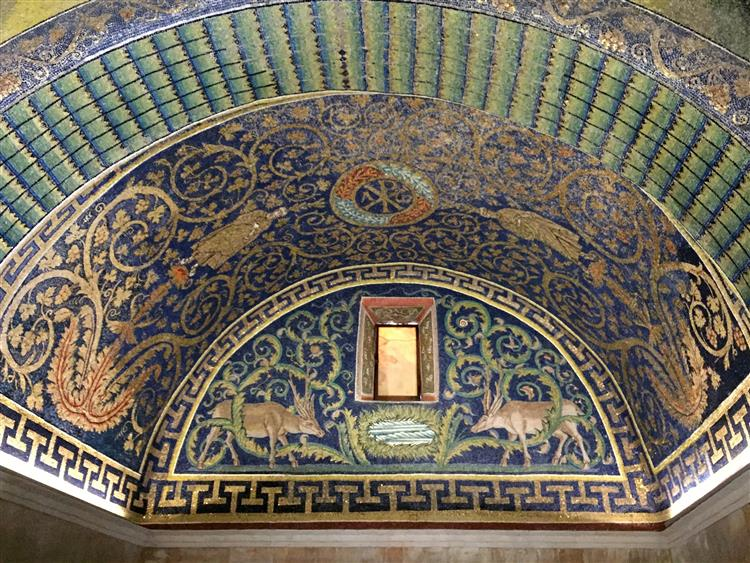

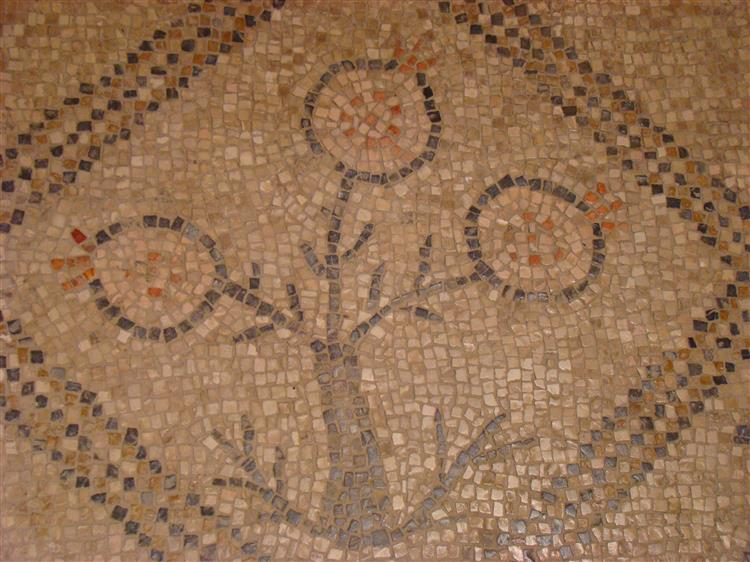

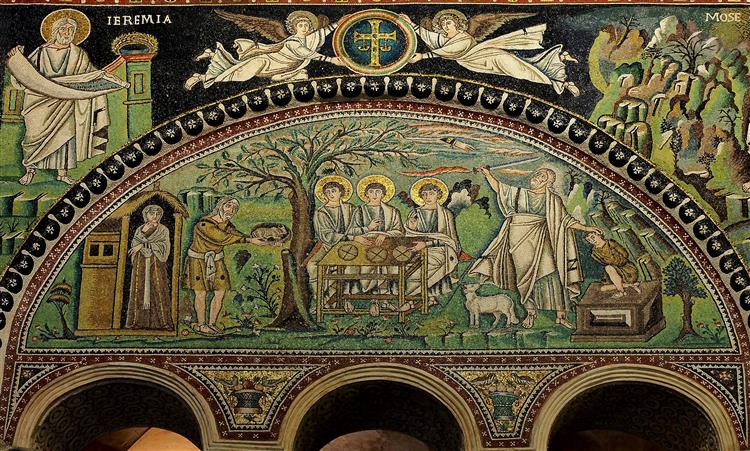

In [14]:
### rerun the cell each time to see the images
import random

style = list_styles[i]

print(f"style = {style}")

df_test = df[df['style']==style]

# Take 3 randomly
df_sample = df_test.sample(min(3, len(df_test)))

# Download and print images
for url in df_sample['img']:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    display(img)

i+=1

Asked ChatGPT to give me the date of all styles to filter art styles that were after 1800. 
In CSV I put 1 if it was after 1800 and 0 if it was before.

In [15]:
file_path="styles_uniques_filed.csv"
styles_filtered = pd.read_csv(file_path, encoding='utf-8', sep=";")
styles_filtered

style  keep
0         Early Byzantine (c. 330–750)     0
1                            Byzantine     0
2    Macedonian Renaissance (867–1056)     0
3       Middle Byzantine (c. 850–1204)     0
4          Komnenian style (1081-1185)     0
..                                 ...   ...
188                 Street Photography     0
189                Sumi-e (Suiboku-ga)     0
190                     Joseon Dynasty     0
191                           Ero guro     0
192                             Yoruba     0

[193 rows x 2 columns]

In [16]:
styles_to_keep = list(styles_filtered[styles_filtered['keep']==1]['style'])
styles_to_keep

['Orientalism',
 'Neoclassicism',
 'Naturalism',
 'Romanticism',
 'Academicism',
 'Neo-Rococo',
 'Kitsch',
 'Realism',
 'Impressionism',
 'Expressionism',
 'Japonism',
 'Magic Realism',
 'Symbolism',
 'Costumbrismo',
 'Biedermeier',
 'Luminism',
 'Ink and wash painting',
 'Naïve Art (Primitivism)',
 'Art Nouveau (Modern)',
 'Divisionism',
 'Social Realism',
 'Tonalism',
 'Post-Impressionism',
 'Pointillism',
 'American Realism',
 'Socialist Realism',
 'Fauvism',
 'Cubism',
 'Abstract Art',
 'Precisionism',
 'Figurative Expressionism',
 'Existential Art',
 'Surrealism',
 'New Realism',
 'Neo-baroque',
 'Abstract Expressionism',
 'Neo-Romanticism',
 'Neo-Impressionism',
 'Cloisonnism',
 'Synthetism',
 'Regionalism',
 'Orphism',
 'Art Deco',
 'Neo-Expressionism',
 'Fantasy Art',
 'New Medievialism',
 'Neo-Byzantine',
 'Lyrical Abstraction',
 'New Ink Painting',
 'Verism',
 'Contemporary Realism',
 'Color Field Painting',
 'Art Brut',
 'Outsider art',
 'Cubo-Expressionism',
 'Pop Art',
 'G

In [17]:
styles_to_keep = ['Orientalism',
 'Neoclassicism',
 'Naturalism',
 'Romanticism',
 'Academicism',
 'Neo-Rococo',
 'Kitsch',
 'Realism',
 'Impressionism',
 'Expressionism',
 'Japonism',
 'Magic Realism',
 'Symbolism',
 'Costumbrismo',
 'Biedermeier',
 'Luminism',
 'Ink and wash painting',
 'Naïve Art (Primitivism)',
 'Art Nouveau (Modern)',
 'Divisionism',
 'Social Realism',
 'Tonalism',
 'Post-Impressionism',
 'Pointillism',
 'American Realism',
 'Socialist Realism',
 'Fauvism',
 'Cubism',
 'Abstract Art',
 'Precisionism',
 'Figurative Expressionism',
 'Existential Art',
 'Surrealism',
 'New Realism',
 'Neo-baroque',
 'Abstract Expressionism',
 'Neo-Romanticism',
 'Neo-Impressionism',
 'Cloisonnism',
 'Synthetism',
 'Regionalism',
 'Orphism',
 'Art Deco',
 'Neo-Expressionism',
 'Fantasy Art',
 'New Medievialism',
 'Neo-Byzantine',
 'Lyrical Abstraction',
 'New Ink Painting',
 'Verism',
 'Contemporary Realism',
 'Color Field Painting',
 'Art Brut',
 'Outsider art',
 'Cubo-Expressionism',
 'Pop Art',
 'Geometric',
 'Art Singulier',
 'Action painting',
 'Constructivism',
 'Neoplasticism',
 'Intimism',
 'Dada',
 'Analytical Cubism',
 'Synthetic Cubism',
 'Muralism',
 'Futurism',
 'Cubo-Futurism',
 'Tachisme',
 'Modernismo',
 'Metaphysical art',
 'Excessivism',
 'Classical Realism',
 'Severe Style',
 'Miserablism',
 'Art Informel',
 'Neo-Pop Art',
 'Transavantgarde',
 'Contemporary',
 'Conceptual Art',
 'Light and Space',
 'Junk Art',
 'Shin-hanga',
 'Hard Edge Painting',
 'Neo-Figurative Art',
 'Purism',
 'Tubism',
 'Suprematism',
 'Concretism',
 'Analytical\xa0Realism',
 'Mechanistic Cubism',
 'Neo-Suprematism',
 'Automatic Painting',
 'Op Art',
 'Minimalism',
 'Post-Minimalism',
 'Post-Painterly Abstraction',
 'Neo-Concretism',
 'Lettrism',
 'Kinetic Art',
 'New European Painting',
 'P&D (Pattern and Decoration)',
 'New Casualism',
 'Neo-Dada',
 'Spectralism',
 'Rayonism',
 'Synchromism',
 'Modernism',
 'Feminist Art',
 'Transautomatism',
 'Fantastic Realism',
 'Photorealism',
 'Hyper-Realism',
 'Nouveau Réalisme',
 'Postcolonial art',
 'Sots Art',
 'Indian Space painting',
 'Spatialism',
 'Cartographic Art',
 'Superflat',
 'Mail Art',
 'Neo-Minimalism',
 'Fiber art',
 'Street art',
 'Neo-Geo',
 'Maximalism',
 'Queer art',
 'Digital Art',
 'Cyber Art',
 'Poster Art Realism',
 'Hyper-Mannerism (Anachronism)',
 'Confessional Art',
 'Neo-Orthodoxism',
 'Graffiti Art',
 'Lowbrow Art',
 'Stuckism']

In [18]:
df_cleaned_styles = df[df['style'].isin(styles_to_keep)]
df_cleaned_styles

artist                    style                      genre  \
3133      Gentile Bellini              Orientalism                   portrait   
3134      Gentile Bellini              Orientalism                   portrait   
3136      Gentile Bellini              Orientalism    portrait,genre painting   
3137      Gentile Bellini              Orientalism  portrait,sketch and study   
3138      Gentile Bellini              Orientalism  portrait,sketch and study   
...                   ...                      ...                        ...   
176339  Norval Morrisseau  Naïve Art (Primitivism)          symbolic painting   
176340  Norval Morrisseau  Naïve Art (Primitivism)          symbolic painting   
176341  Norval Morrisseau  Naïve Art (Primitivism)          symbolic painting   
176342  Norval Morrisseau  Naïve Art (Primitivism)            animal painting   
176343  Norval Morrisseau  Naïve Art (Primitivism)                   portrait   

                 movement                             tags  \
3133    Early Renaissance  ['Turban', 'Cheek', 'Headgear']   
3134    Early Renaissance        ['Holyplaces', 'Monarch']   
3136    Early Renaissance                      ['Textile']   
3137    Early Renaissance                              NaN   
3138    Early Renaissance      ['Sketch', 'Figuredrawing']   
...                   ...                              ...   
176339         Native Art                     ['Organism']   
176340         Native Art                     ['Organism']   
176341         Native Art                              NaN   
176342         Native Art                          ['Owl']   
176343         Native Art                     ['Organism']   

                                                      url  \
3133    https://www.wikiart.org/en/gentile-bellini/por...   
3134    https://www.wikiart.org/en/gentile-bellini/por...   
3136    https://www.wikiart.org/en/gentile-bellini/der...   
3137    https://www.wikiart.org/en/gentile-bellini/a-t...   
3138    https://www.wikiart.org/en/gentile-bellini/a-t...   
...                                                   ...   
176339  https://www.wikiart.org/en/norval-morrisseau/t...   
176340  https://www.wikiart.org/en/norval-morrisseau/t...   
176341  https://www.wikiart.org/en/norval-morrisseau/t...   
176342  https://www.wikiart.org/en/norval-morrisseau/t...   
176343  https://www.wikiart.org/en/norval-morrisseau/g...   

                                                      img  \
3133    https://uploads6.wikiart.org/00296/images/gent...   
3134    https://uploads2.wikiart.org/00290/images/gent...   
3136    https://uploads2.wikiart.org/00290/images/gent...   
3137    https://uploads8.wikiart.org/00290/images/gent...   
3138    https://uploads5.wikiart.org/00290/images/gent...   
...                                                   ...   
176339  https://uploads5.wikiart.org/images/norval-mor...   
176340  https://uploads8.wikiart.org/images/norval-mor...   
176341  https://uploads0.wikiart.org/images/norval-mor...   
176342  https://uploads2.wikiart.org/images/norval-mor...   
176343  https://uploads2.wikiart.org/images/norval-mor...   

                                                file_name  
3133                    3662-59c8d4c345d2a027e83cb812.jpg  
3134                         3663-gentile-bellini-003.jpg  
3136                         3665-gentile-bellini-009.jpg  
3137          3666-a-turkish-woman-by-gentile-bellini.jpg  
3138    3667-yenieri-aturkishjanissary-gentilebellini.jpg  
...                                                   ...  
176339  253307-the-shaman-and-his-apprentice-and-five-...  
176340                             253308-the-wedding.jpg  
176341                            253309-tree-of-life.jpg  
176342                 253310-two-owls-and-two-chicks.jpg  
176343                  253311-grandfather-with-child.jpg  

[146995 rows x 8 columns]

In [19]:
df_cleaned_styles.shape

(146995, 8)

# Filter the database by movement

Movement values are the same as styles so we are going to use the same filter :

In [20]:
df_cleaned_styles_movements = df_cleaned_styles[df_cleaned_styles['movement'].isin(styles_to_keep)]
df_cleaned_styles_movements

artist          style       genre       movement  \
23822   Claude-Joseph Vernet  Neoclassicism   landscape  Neoclassicism   
23823   Claude-Joseph Vernet  Neoclassicism   landscape  Neoclassicism   
23824   Claude-Joseph Vernet  Neoclassicism   landscape  Neoclassicism   
23825   Claude-Joseph Vernet  Neoclassicism  cloudscape  Neoclassicism   
23826   Claude-Joseph Vernet  Neoclassicism      marina  Neoclassicism   
...                      ...            ...         ...            ...   
174482          EtchingRoom1   Contemporary    no genre   Contemporary   
174483          EtchingRoom1   Contemporary    no genre   Contemporary   
174484          EtchingRoom1   Contemporary    no genre   Contemporary   
174485          EtchingRoom1   Contemporary    no genre   Contemporary   
174486          EtchingRoom1   Contemporary    no genre   Contemporary   

                                                     tags  \
23822   ['Nature', 'Naturallandscape', 'Atmosphericphe...   
23823   ['Waterway', 'Watercraftrowing', 'Gondola', 'B...   
23824            ['Sky', 'Ruralarea', 'Highland', 'Hill']   
23825   ['Sky', 'Cloud', 'Horizon', 'Atmosphere', 'Eco...   
23826                                             ['Sky']   
...                                                   ...   
174482                                                NaN   
174483                                                NaN   
174484                                                NaN   
174485                                                NaN   
174486                                                NaN   

                                                      url  \
23822   https://www.wikiart.org/en/claude-joseph-verne...   
23823   https://www.wikiart.org/en/claude-joseph-verne...   
23824   https://www.wikiart.org/en/claude-joseph-verne...   
23825   https://www.wikiart.org/en/claude-joseph-verne...   
23826   https://www.wikiart.org/en/claude-joseph-verne...   
...                                                   ...   
174482  https://www.wikiart.org/en/etchingroom1/untitl...   
174483  https://www.wikiart.org/en/etchingroom1/untitl...   
174484  https://www.wikiart.org/en/etchingroom1/untitl...   
174485  https://www.wikiart.org/en/etchingroom1/untitl...   
174486  https://www.wikiart.org/en/etchingroom1/untitl...   

                                                      img  \
23822   https://uploads5.wikiart.org/00128/images/clau...   
23823   https://uploads8.wikiart.org/00128/images/clau...   
23824   https://uploads8.wikiart.org/00128/images/clau...   
23825   https://uploads1.wikiart.org/00128/images/clau...   
23826   https://uploads0.wikiart.org/00259/images/clau...   
...                                                   ...   
174482  https://uploads1.wikiart.org/00417/images/etch...   
174483  https://uploads1.wikiart.org/00417/images/etch...   
174484  https://uploads1.wikiart.org/00417/images/etch...   
174485  https://uploads1.wikiart.org/00417/images/etch...   
174486  https://uploads1.wikiart.org/00417/images/etch...   

                                                file_name  
23822                  28564-the-waterfalls-at-tivoli.jpg  
23823   28565-the-bridge-and-the-castel-sant-angelo-in...  
23824                        28566-villa-at-caprarola.jpg  
23825                               28567-vedi-titolo.jpg  
23826        28568-night-a-port-in-the-moonlight-1748.jpg  
...                                                   ...  
174482                                      251072-22.jpg  
174483                                      251073-23.jpg  
174484                                      251074-24.jpg  
174485                                      251075-25.jpg  
174486                                      251076-26.jpg  

[131122 rows x 8 columns]

# Filter the database by genres

Genre is not a unique value, so transform it into a list : 

In [21]:
df_cleaned_styles_movements = df_cleaned_styles_movements.copy()
df_cleaned_styles_movements['genre_list'] = df_cleaned_styles_movements['genre'].str.split(',\s*', regex=True)
df_cleaned_styles_movements['genre_list'] 

23822      [landscape]
23823      [landscape]
23824      [landscape]
23825     [cloudscape]
23826         [marina]
              ...     
174482      [no genre]
174483      [no genre]
174484      [no genre]
174485      [no genre]
174486      [no genre]
Name: genre_list, Length: 131122, dtype: object

In [22]:
df_genres = df_cleaned_styles_movements['genre_list']

In [23]:
from collections import Counter

# On récupère toutes les listes en ignorant les NaN
all_genres = [genre for sublist in df_cleaned_styles_movements['genre_list'] if isinstance(sublist, list) for genre in sublist]

# Compter les occurrences
genre_counts = Counter(all_genres)

# Convertir en DataFrame pour une lecture facile
import pandas as pd
df_genre_counts = pd.DataFrame(genre_counts.items(), columns=['genre', 'count']).sort_values(by='count', ascending=False)

df_genre_counts

genre  count
0                  landscape  20742
5                   portrait  18994
4             genre painting  17969
44                  abstract  14445
30                figurative   7167
3                  cityscape   7114
8           sketch and study   4864
28                still life   3833
11         symbolic painting   3802
17        nude painting (nu)   3589
10              illustration   3493
16                 sculpture   2866
2                     marina   2793
13        religious painting   2361
12             self-portrait   1923
25                  no genre   1914
52              installation   1909
22           flower painting   1904
26           animal painting   1775
35                     photo   1511
19                    design   1345
7      mythological painting   1301
9                   interior   1147
6           history painting    975
15         literary painting    689
18      allegorical painting    658
1                 cloudscape    652
21                caricature    642
38                    poster    546
14           battle painting    440
58                  graffiti    275
31         wildlife painting    260
43              tessellation    187
33             advertisement    114
40               performance     82
20                    veduta     70
37                     mural     70
45              architecture     56
34                 miniature     55
27                   utensil     47
57                   digital     45
24                 pastorale     43
36                   vanitas     33
49                    mosaic     30
53               calligraphy     28
23                 capriccio     27
46                 furniture     22
56                    pin-up     19
39                  tapestry     17
41              trompe-l'œil     17
54                     video     14
32                  panorama     12
55                    object     11
47                 shan shui     11
29                quadratura      7
59             artist's book      6
48  bird-and-flower painting      4
42                 animation      2
50         augmented reality      2
51                  ornament      1

In [24]:
# Exporter en CSV
file_path="genres_uniques.csv"
df_genre_counts.to_csv(file_path, index=False)

Tool to print manually some images :

genre = mural


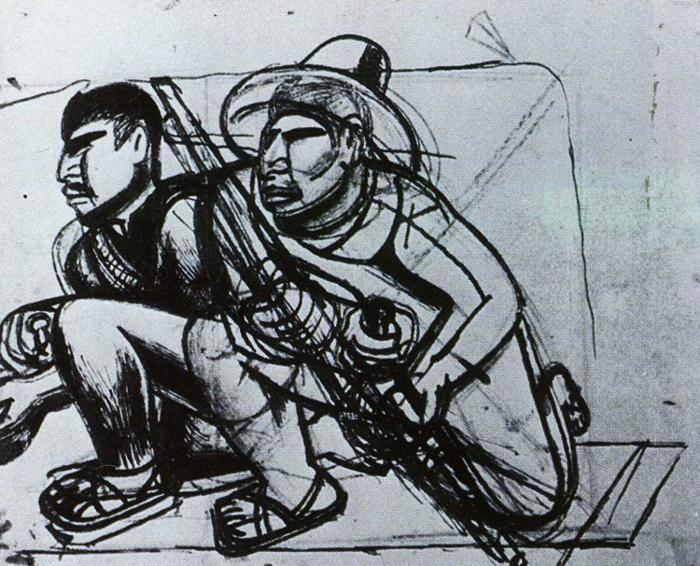

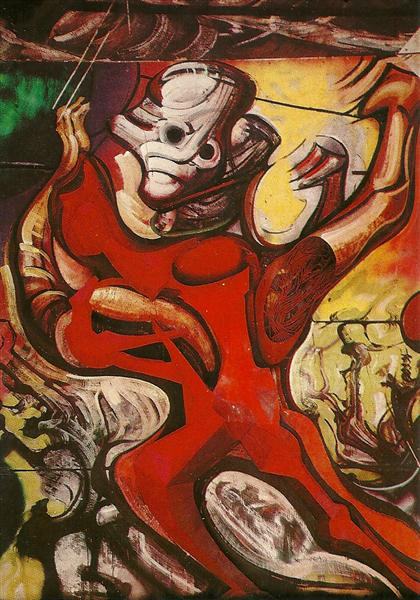

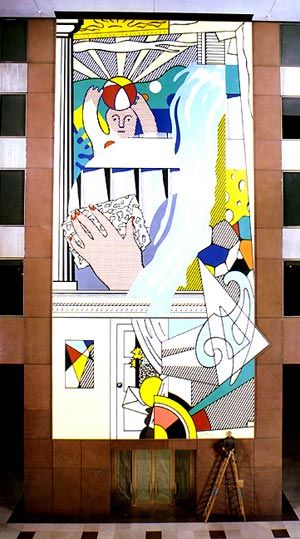

In [25]:
### rerun the cell each time to see the images
import random

genre = 'mural'

print(f"genre = {genre}")

df_test = df_cleaned_styles_movements[df_cleaned_styles_movements['genre_list'].apply(lambda x: genre in x if isinstance(x, list) else False)]

# Take 3 randomly
df_sample = df_test.sample(min(3, len(df_test)))

# Download and print images
for url in df_sample['img']:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    display(img)

==> Manually chosed in the CSV what genre have to be dropped : sculpture, architecture etc. To only keep paintings

In [26]:
file_path="genres_uniques_filed.csv"
genres_filtered = pd.read_csv(file_path, encoding='utf-8', sep=';')
genres_filtered

genre  count  drop
0        landscape  21688   NaN
1         portrait  20954   NaN
2   genre painting  19860   NaN
3         abstract  15270   NaN
4       figurative   7836   NaN
..             ...    ...   ...
59          object     11   1.0
60   artist's book      9   1.0
61        ornament      5   1.0
62       animation      2   1.0
63          tronie      1   1.0

[64 rows x 3 columns]

In [27]:
genres_to_drop = list(genres_filtered[genres_filtered['drop']==1]['genre'])
genres_to_drop

['sketch and study',
 'sculpture',
 'design',
 'installation',
 'no genre',
 'photo',
 'poster',
 'caricature',
 'graffiti',
 'advertisement',
 'utensil',
 'veduta',
 'performance',
 'capriccio',
 'mural',
 'bird-and-flower painting',
 'digital',
 'architecture',
 'mobile',
 'miniature',
 'tapestry',
 'pastorale',
 'furniture',
 'calligraphy',
 'shan shui',
 'mosaic',
 'vanitas',
 'jewelry',
 'pin-up',
 'video',
 "trompe-l'œil",
 'panorama',
 'stabile',
 'augmented reality',
 'quadratura',
 'object',
 "artist's book",
 'ornament',
 'animation',
 'tronie']

In [28]:
genres_to_drop = ['sketch and study',
 'sculpture',
 'design',
 'installation',
 'no genre',
 'photo',
 'poster',
 'caricature',
 'graffiti',
 'advertisement',
 'utensil',
 'veduta',
 'performance',
 'capriccio',
 'mural',
 'bird-and-flower painting',
 'digital',
 'architecture',
 'mobile',
 'miniature',
 'tapestry',
 'pastorale',
 'furniture',
 'calligraphy',
 'shan shui',
 'mosaic',
 'vanitas',
 'jewelry',
 'pin-up',
 'video',
 "trompe-l'œil",
 'panorama',
 'stabile',
 'augmented reality',
 'quadratura',
 'object',
 "artist's book",
 'ornament',
 'animation',
 'tronie']

In [29]:
df_cleaned_styles_movement_genres = df_cleaned_styles_movements[
    df_cleaned_styles_movements['genre_list'].apply(
        lambda x: all(genre not in genres_to_drop for genre in x) if isinstance(x, list) else True
    )
].reset_index(drop=True)
df_cleaned_styles_movement_genres

artist          style       genre       movement  \
0       Claude-Joseph Vernet  Neoclassicism   landscape  Neoclassicism   
1       Claude-Joseph Vernet  Neoclassicism   landscape  Neoclassicism   
2       Claude-Joseph Vernet  Neoclassicism   landscape  Neoclassicism   
3       Claude-Joseph Vernet  Neoclassicism  cloudscape  Neoclassicism   
4       Claude-Joseph Vernet  Neoclassicism      marina  Neoclassicism   
...                      ...            ...         ...            ...   
114577          EtchingRoom1   Contemporary  figurative   Contemporary   
114578          EtchingRoom1   Contemporary  figurative   Contemporary   
114579          EtchingRoom1   Contemporary  figurative   Contemporary   
114580          EtchingRoom1   Contemporary  figurative   Contemporary   
114581          EtchingRoom1   Contemporary  figurative   Contemporary   

                                                     tags  \
0       ['Nature', 'Naturallandscape', 'Atmosphericphe...   
1       ['Waterway', 'Watercraftrowing', 'Gondola', 'B...   
2                ['Sky', 'Ruralarea', 'Highland', 'Hill']   
3       ['Sky', 'Cloud', 'Horizon', 'Atmosphere', 'Eco...   
4                                                 ['Sky']   
...                                                   ...   
114577                                                NaN   
114578                                                NaN   
114579                                                NaN   
114580                                                NaN   
114581                                                NaN   

                                                      url  \
0       https://www.wikiart.org/en/claude-joseph-verne...   
1       https://www.wikiart.org/en/claude-joseph-verne...   
2       https://www.wikiart.org/en/claude-joseph-verne...   
3       https://www.wikiart.org/en/claude-joseph-verne...   
4       https://www.wikiart.org/en/claude-joseph-verne...   
...                                                   ...   
114577  https://www.wikiart.org/en/etchingroom1/untitl...   
114578  https://www.wikiart.org/en/etchingroom1/untitl...   
114579  https://www.wikiart.org/en/etchingroom1/untitl...   
114580  https://www.wikiart.org/en/etchingroom1/untitl...   
114581  https://www.wikiart.org/en/etchingroom1/untitl...   

                                                      img  \
0       https://uploads5.wikiart.org/00128/images/clau...   
1       https://uploads8.wikiart.org/00128/images/clau...   
2       https://uploads8.wikiart.org/00128/images/clau...   
3       https://uploads1.wikiart.org/00128/images/clau...   
4       https://uploads0.wikiart.org/00259/images/clau...   
...                                                   ...   
114577  https://uploads0.wikiart.org/00394/images/etch...   
114578  https://uploads0.wikiart.org/00394/images/etch...   
114579  https://uploads0.wikiart.org/00394/images/etch...   
114580  https://uploads0.wikiart.org/00394/images/etch...   
114581  https://uploads0.wikiart.org/00394/images/etch...   

                                                file_name    genre_list  
0                      28564-the-waterfalls-at-tivoli.jpg   [landscape]  
1       28565-the-bridge-and-the-castel-sant-angelo-in...   [landscape]  
2                            28566-villa-at-caprarola.jpg   [landscape]  
3                                   28567-vedi-titolo.jpg  [cloudscape]  
4            28568-night-a-port-in-the-moonlight-1748.jpg      [marina]  
...                                                   ...           ...  
114577                                      251055-24.jpg  [figurative]  
114578                                      251056-25.jpg  [figurative]  
114579                                      251057-21.jpg  [figurative]  
114580                                      251058-22.jpg  [figurative]  
114581                                      251059-23.jpg  [figurative]  

[114582 rows x 9 columns]

In [30]:
df_cleaned_styles_movement_genres.shape

(114582, 9)

In [31]:
df_cleaned_styles_movement_genres.isna().sum()

artist            0
style             0
genre             0
movement          0
tags          29155
url               0
img               0
file_name         0
genre_list        0
dtype: int64

# Drop duplicates

In [32]:
df_cleaned_styles_movement_genres.duplicated(subset=['img']).sum()

np.int64(21)

In [33]:
df_cleaned_styles_movement_genres.duplicated(subset=['file_name']).sum()

np.int64(0)

In [34]:
df_filtered = df_cleaned_styles_movement_genres.drop_duplicates(subset=['img'], keep='first')

In [35]:
df_filtered.shape

(114561, 9)

In [36]:
deleted = 114582-114561
deleted

21

# CODE : FUNCTIONS TO CLEAN dataframe

In [37]:
def load_data() : 
    """load the dataframe from kaggle"""
    # Set the path to the file you'd like to load
    file_path = "wikiart_art_pieces.csv"
    
    # Load the latest version
    df = kagglehub.load_dataset(
      KaggleDatasetAdapter.PANDAS,
      "simolopes/wikiart-all-artpieces",
      file_path
    )

    return df 

In [38]:
def filter_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    """clean the dataframe to keep categories wanted"""

    #lists : 
    styles_to_keep = ['Orientalism', 'Neoclassicism', 'Naturalism', 'Romanticism', 'Academicism', 'Neo-Rococo', 'Kitsch', 'Realism', 'Impressionism', 'Expressionism', 'Japonism', 'Magic Realism', 'Symbolism', 'Costumbrismo', 'Biedermeier', 'Luminism', 'Ink and wash painting', 'Naïve Art (Primitivism)', 'Art Nouveau (Modern)', 'Divisionism', 'Social Realism', 'Tonalism', 'Post-Impressionism', 'Pointillism', 'Ukiyo-e', 'American Realism', 'Socialist Realism', 'Fauvism', 'Cubism', 'Abstract Art', 'Precisionism', 'Figurative Expressionism', 'Existential Art', 'Surrealism', 'New Realism', 'Neo-baroque', 'Abstract Expressionism', 'Neo-Romanticism', 'Neo-Impressionism', 'Cloisonnism', 'Synthetism', 'Regionalism', 'Orphism', 'Art Deco', 'Neo-Expressionism', 'Fantasy Art', 'New Medievialism', 'Neo-Byzantine', 'Lyrical Abstraction', 'New Ink Painting', 'Verism', 'Contemporary Realism', 'Color Field Painting', 'Art Brut', 'Outsider art', 'Cubo-Expressionism', 'Pop Art', 'Geometric', 'Art Singulier', 'Action painting', 'Constructivism', 'Neoplasticism', 'Intimism', 'Dada', 'Analytical Cubism', 'Synthetic Cubism', 'Muralism', 'Futurism', 'Cubo-Futurism', 'Tachisme', 'Modernismo', 'Metaphysical art', 'Excessivism', 'Classical Realism', 'Severe Style', 'Miserablism', 'Art Informel', 'Neo-Pop Art', 'Native Art', 'Transavantgarde', 'Contemporary', 'Conceptual Art', 'Light and Space', 'Junk Art', 'Shin-hanga', 'Hard Edge Painting', 'Neo-Figurative Art', 'Purism', 'Tubism', 'Suprematism', 'Concretism', 'Analytical\xa0Realism', 'Mechanistic Cubism', 'Neo-Suprematism', 'Automatic Painting', 'Op Art', 'Minimalism', 'Post-Minimalism', 'Post-Painterly Abstraction', 'Neo-Concretism', 'Lettrism', 'Kinetic Art', 'New European Painting', 'P&D (Pattern and Decoration)', 'New Casualism', 'Neo-Dada', 'Spectralism', 'Rayonism', 'Synchromism', 'Modernism', 'Feminist Art', 'Transautomatism', 'Fantastic Realism', 'Photorealism', 'Hyper-Realism', 'Nouveau Réalisme', 'Postcolonial art', 'Sots Art', 'Indian Space painting', 'Zen', 'Spatialism', 'Cartographic Art', 'Superflat', 'Mail Art', 'Neo-Minimalism', 'Fiber art', 'Street art', 'Neo-Geo', 'Maximalism', 'Queer art', 'Digital Art', 'Cyber Art', 'Poster Art Realism', 'Hyper-Mannerism (Anachronism)', 'Confessional Art', 'Neo-Orthodoxism', 'Graffiti Art', 'Lowbrow Art', 'Stuckism']
    genres_to_drop = ['sketch and study', 'sculpture', 'design', 'installation', 'no genre', 'photo', 'poster', 'caricature', 'graffiti', 'advertisement', 'utensil', 'veduta', 'performance', 'capriccio', 'mural', 'bird-and-flower painting', 'digital', 'architecture', 'mobile', 'miniature', 'tapestry', 'pastorale', 'furniture', 'calligraphy', 'shan shui', 'mosaic', 'vanitas', 'jewelry', 'pin-up', 'video', "trompe-l'œil", 'panorama', 'stabile', 'augmented reality', 'quadratura', 'object', "artist's book", 'ornament', 'animation', 'tronie']
    
    #Clean the styles
    df_cleaned_styles = df[df['style'].isin(styles_to_keep)]

    #Clean the movement
    df_cleaned_styles_movements = df_cleaned_styles[df_cleaned_styles['movement'].isin(styles_to_keep)]

    #Create a copy of the dataframe and split the genres to a list (multiple values possibles)
    df_cleaned_styles_movements_copy = df_cleaned_styles_movements.copy()
    df_cleaned_styles_movements_copy['genre_list'] = df_cleaned_styles_movements_copy['genre'].str.split(',\s*', regex=True)
    df_cleaned_styles_movements_copy = df_cleaned_styles_movements_copy.drop(columns='genre')

    # Clean the genres (chosed the ones to drop)
    df_cleaned_styles_movement_genres = df_cleaned_styles_movements_copy[df_cleaned_styles_movements_copy['genre_list'].apply(
        lambda x: all(genre not in genres_to_drop for genre in x) if isinstance(x, list) else True
    )]

    df_filtered = df_cleaned_styles_movement_genres.drop_duplicates(subset=['img'], keep='first')
    df_filtered = df_filtered.set_index("file_name", drop=False)
    return df_filtered

In [39]:
df = load_data()
df_filtered = filter_dataframe(df=df)

/tmp/ipykernel_5042/1070418083.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [40]:
df_filtered.head()

artist  \
file_name                                                                  
28564-the-waterfalls-at-tivoli.jpg                  Claude-Joseph Vernet   
28565-the-bridge-and-the-castel-sant-angelo-in-...  Claude-Joseph Vernet   
28566-villa-at-caprarola.jpg                        Claude-Joseph Vernet   
28567-vedi-titolo.jpg                               Claude-Joseph Vernet   
28568-night-a-port-in-the-moonlight-1748.jpg        Claude-Joseph Vernet   

                                                            style  \
file_name                                                           
28564-the-waterfalls-at-tivoli.jpg                  Neoclassicism   
28565-the-bridge-and-the-castel-sant-angelo-in-...  Neoclassicism   
28566-villa-at-caprarola.jpg                        Neoclassicism   
28567-vedi-titolo.jpg                               Neoclassicism   
28568-night-a-port-in-the-moonlight-1748.jpg        Neoclassicism   

                                                         movement  \
file_name                                                           
28564-the-waterfalls-at-tivoli.jpg                  Neoclassicism   
28565-the-bridge-and-the-castel-sant-angelo-in-...  Neoclassicism   
28566-villa-at-caprarola.jpg                        Neoclassicism   
28567-vedi-titolo.jpg                               Neoclassicism   
28568-night-a-port-in-the-moonlight-1748.jpg        Neoclassicism   

                                                                                                 tags  \
file_name                                                                                               
28564-the-waterfalls-at-tivoli.jpg                  ['Nature', 'Naturallandscape', 'Atmosphericphe...   
28565-the-bridge-and-the-castel-sant-angelo-in-...  ['Waterway', 'Watercraftrowing', 'Gondola', 'B...   
28566-villa-at-caprarola.jpg                                 ['Sky', 'Ruralarea', 'Highland', 'Hill']   
28567-vedi-titolo.jpg                               ['Sky', 'Cloud', 'Horizon', 'Atmosphere', 'Eco...   
28568-night-a-port-in-the-moonlight-1748.jpg                                                  ['Sky']   

                                                                                                  url  \
file_name                                                                                               
28564-the-waterfalls-at-tivoli.jpg                  https://www.wikiart.org/en/claude-joseph-verne...   
28565-the-bridge-and-the-castel-sant-angelo-in-...  https://www.wikiart.org/en/claude-joseph-verne...   
28566-villa-at-caprarola.jpg                        https://www.wikiart.org/en/claude-joseph-verne...   
28567-vedi-titolo.jpg                               https://www.wikiart.org/en/claude-joseph-verne...   
28568-night-a-port-in-the-moonlight-1748.jpg        https://www.wikiart.org/en/claude-joseph-verne...   

                                                                                                  img  \
file_name                                                                                               
28564-the-waterfalls-at-tivoli.jpg                  https://uploads5.wikiart.org/00128/images/clau...   
28565-the-bridge-and-the-castel-sant-angelo-in-...  https://uploads8.wikiart.org/00128/images/clau...   
28566-villa-at-caprarola.jpg                        https://uploads8.wikiart.org/00128/images/clau...   
28567-vedi-titolo.jpg                               https://uploads1.wikiart.org/00128/images/clau...   
28568-night-a-port-in-the-moonlight-1748.jpg        https://uploads0.wikiart.org/00259/images/clau...   

                                                                                            file_name  \
file_name                                                                                               
28564-the-waterfalls-at-tivoli.jpg                                 28564-the-waterfalls-at-tivoli.jpg   
28565-the-bridge-and-the-castel-sant-angel

In [41]:
df_filtered.shape

(115055, 8)